# PlayStore Crawler
## 날짜 : 2021-03-17 수요일
## 저자 : 이준호, 최인서, 이승수, 조영모
### 참조 : https://signing.tistory.com/44?category=417668

# 목차
## 1. URL open, data crawling test
## 2. 대규모 crawling, pandas에 넣기
## 3. Data check 및 전처리
## 4. Data csv file로 save

## 1. URL open, data crawling test
## !! URL 및 chromedriver path 수정하기 !!

In [1]:
# selenium import
from selenium import webdriver

# !!수정하기!! 접속 시도하려는 URL 입력
url = "https://play.google.com/store/apps/details?id=com.cjenm.ModooMarbleKakao&showAllReviews=true"
# !!수정하기!! 크롬 드라이버 경로
# windows는 ./chromedriver.exe 로 수정
driverPath = "./chromedriver" # Chrome Driver path
driver = webdriver.Chrome(driverPath)   # Open Chrome 
driver.get(url)

In [2]:
# 리뷰 data를 xpath로 찾아서 긁어오기
review = driver.find_element_by_xpath("//span[@jsname='bN97Pc']")
date = driver.find_element_by_xpath("//span[@class='p2TkOb']")
star = driver.find_element_by_xpath("//span[@class='nt2C1d']/div[@class='pf5lIe']/div[@role='img']") 

# 읽어온 data 출력
print("리뷰 데이터:", review.text)
print("날짜 데이터:", date.text)
print("별점 데이터:", star.get_attribute('aria-label'))

리뷰 데이터: 게임 자체는 그렇게 나쁘진 않네요. 다만 매칭의 밸런스가 고인물과 초보와 매칭이 되네요. 그리고 제일 불만인건 현질입니다. 확률이 적으면 현질가격은 적어야 되는데 3,5,10만원으로 나누어져 있어서 있고 그 가격에 비해 주는 아이템들도 가격에 비해 많이 적다고 생각합니다. 애초에 현질은 유저가 이 게임이 재밌어서 좀 더 키우려고 하는거지 이렇게 유도를 하는 방식으로 현질을 하고싶은 사람들은 없습니다. 저 외에도 많은분들의 생각이 아마 똑같을겁니다. 혹시라도 제 글을 보셨더라면 패치,업데이트등 부탁드립니다. 운영자분들의 생각또한 존중...
전체 리뷰
날짜 데이터: 2021년 3월 13일
별점 데이터: 별표 5개 만점에 2개를 받았습니다.


## 2. 대규모 crawling, pandas에 넣기

In [3]:
# time 라이브러리 import
import time
SCROLL_PAUSE_TIME = 1.5
last_height = driver.execute_script("return document.body.scrollHeight")

# review 긁어오는 횟수, count x 40개 긁어옴
count = 32

while count > 0:
    # (1) 4번의 스크롤링
    for i in range(8):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
    # (2) 더보기 클릭
    driver.find_element_by_xpath("//span[@class='RveJvd snByac']").click()
    # 카운트 세는 용도
    count -= 1
    # (3) 종료 조건
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [4]:
# crawling data 불러오기
reviews = driver.find_elements_by_xpath("//span[@jsname='bN97Pc']")
dates = driver.find_elements_by_xpath("//span[@class='p2TkOb']")
stars = driver.find_elements_by_xpath("//span[@class='nt2C1d']/div[@class='pf5lIe']/div[@role='img']") 

In [5]:
# crawling data 길이 확인
len(reviews)

5200

In [6]:
# crawling한 data를 pandas에 넣기
import pandas as pd

res_dict = [] 
for i in range(len(reviews)): 
    res_dict.append({ 
        'DATE' : dates[i].text,
        'STAR' : stars[i].get_attribute('aria-label'), 
        'REVIEW' : reviews[i].text }) 
    res_df = pd.DataFrame(res_dict) 

# dataframe 확인
res_df

# csv 저장하기
res_df.to_csv("모두의마블.csv", encoding="utf-8-sig")

In [7]:
# dataframe 확인
res_df.head(5)

,DATE,STAR,REVIEW
0,2021년 3월 13일,별표 5개 만점에 2개를 받았습니다.,게임 자체는 그렇게 나쁘진 않네요. 다만 매칭의 밸런스가 고인물과 초보와 매칭이 되...
1,2021년 3월 17일,별표 5개 만점에 5개를 받았습니다.,모두의 마블이 현질 때문에 그렇지 다른 점은 다 좋아요 ㅎㅎ 이번 같은 경우에도 업...
2,2021년 3월 13일,별표 5개 만점에 1개를 받았습니다.,이런 게임은 난생 처음봄. 게임은 실력으로 하는건데 이건 그냥 현질 많이해서 캐릭이...
3,2021년 2월 18일,별표 5개 만점에 1개를 받았습니다.,이벤트로 현질 유도 10만......?????? ㅋㅋㅋㅋㅋㅋㅋㅋ 뭐 .. 제일 좋다...
4,2021년 3월 3일,별표 5개 만점에 1개를 받았습니다.,캐릭터를 많이 만드는건 좋은데 밸런스가 붕괴 캐릭터 심한 현질유도등 너무 심합니다....


In [8]:
# chrome driver 종료
driver.close()

## 3. Data check 및 전처리

In [1]:
import pandas as pd
res_df = pd.read_csv("모두의마블.csv", index_col = 0)

# 별점 data 숫자로 전처리하기
a = []
for i in range(len(res_df['STAR'])):
    a.append(res_df['STAR'][i][10:11])

res_df.drop('STAR', axis=1, inplace=True)
res_df.insert(1, "STAR", a)

# 날짜 data 전처리
for i in range(len(res_df['DATE'])):
    res_df['DATE'][i] = res_df['DATE'][i].replace('년 ', '-').replace('월 ', '-').replace('일', '')

In [2]:
# 문자열 -> 숫자변환
res_df["STAR"] = pd.to_numeric(res_df["STAR"])

In [3]:
# 전처리 data 확인
res_df.head(5)

,DATE,STAR,REVIEW
0,2021-3-13,2,게임 자체는 그렇게 나쁘진 않네요. 다만 매칭의 밸런스가 고인물과 초보와 매칭이 되...
1,2021-3-17,5,모두의 마블이 현질 때문에 그렇지 다른 점은 다 좋아요 ㅎㅎ 이번 같은 경우에도 업...
2,2021-3-13,1,이런 게임은 난생 처음봄. 게임은 실력으로 하는건데 이건 그냥 현질 많이해서 캐릭이...
3,2021-2-18,1,이벤트로 현질 유도 10만......?????? ㅋㅋㅋㅋㅋㅋㅋㅋ 뭐 .. 제일 좋다...
4,2021-3-3,1,캐릭터를 많이 만드는건 좋은데 밸런스가 붕괴 캐릭터 심한 현질유도등 너무 심합니다....


## 4. Data csv file로 save
## !! 따옴표 안에 게임 이름.csv로 변경 !!

In [25]:
# data csv file로 저장
# !! 따옴표 안에 게임 이름으로 변경 !!
res_df.to_csv('data.csv', encoding="utf-8-sig")

### 리뷰 데이터에 대한 이해와 전처리

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
res_df['LABEL'] = np.select([res_df.STAR >= 3], [1], default=0)
res_df.head()

,DATE,STAR,REVIEW,LABEL
0,2021-3-13,2,게임 자체는 그렇게 나쁘진 않네요. 다만 매칭의 밸런스가 고인물과 초보와 매칭이 되...,0
1,2021-3-17,5,모두의 마블이 현질 때문에 그렇지 다른 점은 다 좋아요 ㅎㅎ 이번 같은 경우에도 업...,1
2,2021-3-13,1,이런 게임은 난생 처음봄. 게임은 실력으로 하는건데 이건 그냥 현질 많이해서 캐릭이...,0
3,2021-2-18,1,이벤트로 현질 유도 10만......?????? ㅋㅋㅋㅋㅋㅋㅋㅋ 뭐 .. 제일 좋다...,0
4,2021-3-3,1,캐릭터를 많이 만드는건 좋은데 밸런스가 붕괴 캐릭터 심한 현질유도등 너무 심합니다....,0


In [6]:
# 중복을 제외한 샘플의 수를 카운트하기
res_df['STAR'].nunique(), res_df['REVIEW'].nunique(), res_df['LABEL'].nunique()

(5, 5200, 2)

In [7]:
# 워드 클라우드 사전준비
df_review = [review for review in res_df['REVIEW'] if type(review) is str]
df_review

['게임 자체는 그렇게 나쁘진 않네요. 다만 매칭의 밸런스가 고인물과 초보와 매칭이 되네요. 그리고 제일 불만인건 현질입니다. 확률이 적으면 현질가격은 적어야 되는데 3,5,10만원으로 나누어져 있어서 있고 그 가격에 비해 주는 아이템들도 가격에 비해 많이 적다고 생각합니다. 애초에 현질은 유저가 이 게임이 재밌어서 좀 더 키우려고 하는거지 이렇게 유도를 하는 방식으로 현질을 하고싶은 사람들은 없습니다. 저 외에도 많은분들의 생각이 아마 똑같을겁니다. 혹시라도 제 글을 보셨더라면 패치,업데이트등 부탁드립니다. 운영자분들의 생각또한 존중...\n전체 리뷰',
 '모두의 마블이 현질 때문에 그렇지 다른 점은 다 좋아요 ㅎㅎ 이번 같은 경우에도 업데이트로 각성 비스킷 또는 각성 시드의 빛을 헹템 이벤트 덕에 다이아 10000개와 골드 5백만(?)정도와 별사탕 10000개 투자해서 각성 비스킷의 빛을 획득해 비스킷을 각성 비스킷으로 업그레이드를 해서 획득했어요! 요즘 가장 얻고 싶었던 캐릭터 카드가 각성 비스킷이였는데..ㅠㅠ 원랜 현질 땜에 별 4개 주고 싶은데.. 이번 이벤트 통해 각성 비스킷도 정말 1개 획득했고, 요즘 모마 재밌게 플레이 하고 있으니 별 5개 드릴게요😄',
 '이런 게임은 난생 처음봄. 게임은 실력으로 하는건데 이건 그냥 현질 많이해서 캐릭이랑 템 많이있는 사람이 이기는 게임임. 그렇다고 해서 이벤트가 혜자인것도 아님. 멀쩡한 카드팩들 놔두고 다이아 천개씩 주고 뽑는 슈퍼카드팩, 슈퍼뽑기 만들어서 기존 카드팩 사서는 이벤트 참여도 못하게 만들어버림. 다이아 몇만개씩 써도 좋은거 하나도 못건짐. 한번 뽑는데에 천개니깐 만개 쓰면 열번까고 아무도 안쓰는 한물 간 캐릭터들 한두개 먹고 끝임. 모으고 또 모아서 참여하더라도 캐릭, 행템 다 맞추려면 결국 현질이 답임. 게임 환경도 별로임. 시비조...\n전체 리뷰',
 '이벤트로 현질 유도 10만......?????? ㅋㅋㅋㅋㅋㅋㅋㅋ 뭐 .. 제일 좋다는 캐릭 한개 받아보고 싶어서 열심히 출석 하고 게임

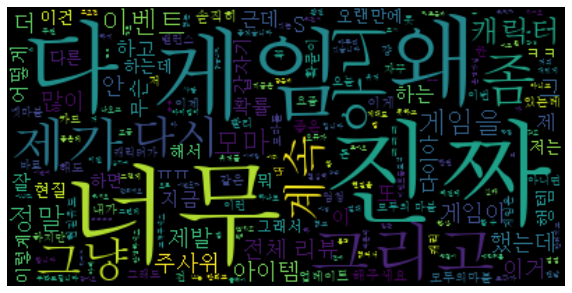

In [8]:
# 워드 클라우드
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = "c:/widows/font/batang.ttc").generate(' '.join(df_review))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
res_df.drop_duplicates(subset=['REVIEW'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 리뷰의 수 :',len(res_df))

총 리뷰의 수 : 5200


In [10]:
print(res_df.isnull().values.any())

False


In [15]:
train_data, test_data = train_test_split(res_df, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 3900
테스트용 리뷰의 개수 : 1300


<AxesSubplot:>

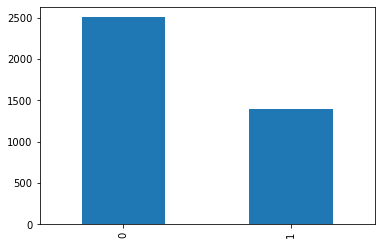

In [17]:
train_data['LABEL'].value_counts().plot(kind = 'bar')

In [18]:
print(train_data.groupby('LABEL').size().reset_index(name = 'COUNT'))

   LABEL  COUNT
0      0   2503
1      1   1397


In [19]:
# 한글과 공백을 제외하고 모두 제거
train_data['REVIEW'] = train_data['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['REVIEW'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

DATE      0
STAR      0
REVIEW    0
LABEL     0
dtype: int64


<ipython-input-19-ab277fe254f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['REVIEW'] = train_data['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
# 테스트용 전처리 동일
test_data.drop_duplicates(subset = ['REVIEW'], inplace=True) # 중복 제거
test_data['REVIEW'] = test_data['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['REVIEW'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 1300


<ipython-input-20-7f1bd956d504>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset = ['REVIEW'], inplace=True) # 중복 제거
<ipython-input-20-7f1bd956d504>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['REVIEW'] = test_data['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [22]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이라고', '차라리', '내', '가', '만드는', '게', '나을', '뻔']


In [23]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [27]:
train_data['tokenized'] = train_data['REVIEW'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-27-30cd1698b984>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['REVIEW'].apply(okt.morphs)
<ipython-input-27-30cd1698b984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [28]:
test_data['tokenized'] = test_data['REVIEW'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [29]:
# 단어와 길이 분포 확인하기
negative_words = np.hstack(train_data[train_data.LABEL == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.LABEL == 1]['tokenized'].values)

In [30]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('게임', 1780), ('안', 1023), ('만', 781), ('현질', 683), ('캐릭터', 615), ('진짜', 614), ('유저', 575), ('로', 569), ('으로', 550), ('하고', 542), ('좀', 530), ('확률', 516), ('못', 490), ('너무', 479), ('왜', 478), ('요', 452), ('아이템', 452), ('이벤트', 436), ('개', 419), ('거', 395)]


In [31]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('게임', 646), ('안', 354), ('너무', 350), ('만', 316), ('캐릭터', 306), ('이벤트', 303), ('요', 279), ('로', 274), ('제', 273), ('좀', 268), ('하고', 261), ('으로', 238), ('때', 213), ('모마', 213), ('다시', 212), ('유저', 212), ('저', 190), ('입니다', 184), ('못', 183), ('개', 182)]


긍정 리뷰의 평균 길이 : 29.750178954903365
부정 리뷰의 평균 길이 : 35.98681582101478


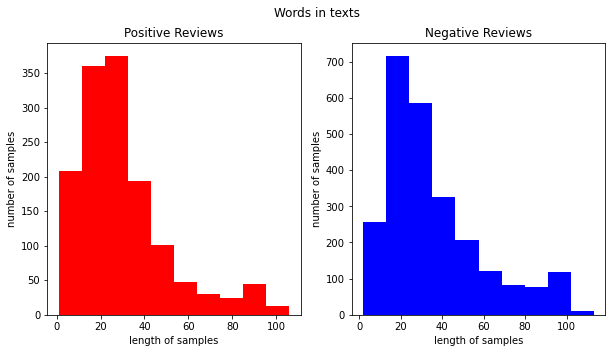

In [32]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['LABEL']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['LABEL']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [33]:
X_train = train_data['tokenized'].values
y_train = train_data['LABEL'].values
X_test= test_data['tokenized'].values
y_test = test_data['LABEL'].values

In [35]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [36]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17682
등장 빈도가 1번 이하인 희귀 단어의 수: 10477
단어 집합에서 희귀 단어의 비율: 59.25234701956792
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.959068947704276


In [37]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7207


In [38]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [39]:
print(X_train[:3])

[[145, 1, 1110, 231, 691, 2758], [7, 4, 53, 116, 1236, 2, 131, 10, 1827, 940, 140, 12, 839, 3, 529, 7, 4, 53, 460, 785, 4, 941, 2, 816, 131, 449, 405, 1111, 216, 271, 7, 53, 4, 1, 9, 186, 2, 81, 364, 1], [692, 82, 1, 85, 222, 66, 3833, 130, 2, 1237, 77, 8, 3, 1828]]


In [40]:
print(X_test[:3])

[[7, 1598, 124, 11, 363, 1266, 1598, 124, 21, 39, 124, 561, 124, 11, 363, 1, 326, 345, 124, 1227, 533, 1, 861, 2192, 124, 11, 332, 36, 369, 861], [1463, 21, 30, 49, 1925, 21, 647, 45, 20, 431, 49, 1703, 1, 871, 925, 2095, 41, 344, 334, 408, 30, 12, 5529, 334, 2095, 41, 9, 160, 41, 1, 3090, 6517, 2, 535, 4600, 144, 1, 1, 81, 1055, 1, 4500, 483, 4516, 1, 1551, 1, 135, 134, 6953, 1, 806, 145, 507, 1, 1551, 251, 15, 806, 145, 13, 2209, 470, 59, 737, 1, 5, 27, 494, 198, 45], [205, 1658, 3760]]


리뷰의 최대 길이 : 113
리뷰의 평균 길이 : 33.75282051282051


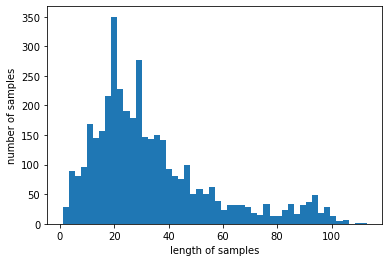

In [52]:
# 패딩
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [55]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list : 
        if(len(s) <= max_len) : 
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' % (max_len, (cnt / len(nested_list))*100))

In [56]:
max_len = 105
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 105 이하인 샘플의 비율: 99.82051282051282


In [57]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [58]:
# GRU로 네이버 쇼핑 리뷰 감성 분류하기# 
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [60]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [61]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
52/52 [==============================] - 13s 192ms/step - loss: 0.1314 - acc: 0.9502 - val_loss: 0.8819 - val_acc: 0.7128

Epoch 00001: val_acc did not improve from 0.74359
Epoch 2/15
52/52 [==============================] - 8s 159ms/step - loss: 0.0585 - acc: 0.9809 - val_loss: 1.0282 - val_acc: 0.7218

Epoch 00002: val_acc did not improve from 0.74359
Epoch 3/15
52/52 [==============================] - 8s 162ms/step - loss: 0.0559 - acc: 0.9823 - val_loss: 1.3255 - val_acc: 0.7256

Epoch 00003: val_acc did not improve from 0.74359
Epoch 4/15
52/52 [==============================] - 8s 155ms/step - loss: 0.0253 - acc: 0.9916 - val_loss: 1.5330 - val_acc: 0.6974

Epoch 00004: val_acc did not improve from 0.74359
Epoch 5/15
52/52 [==============================] - 8s 151ms/step - loss: 0.0122 - acc: 0.9988 - val_loss: 1.5436 - val_acc: 0.7077

Epoch 00005: val_acc did not improve from 0.74359
Epoch 00005: early stopping


In [64]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

41/41 [==============================] - 2s 26ms/step - loss: 0.5389 - acc: 0.7392

 테스트 정확도: 0.7392


In [66]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [67]:
sentiment_predict('이 게임 진짜 좋아요... 저는 강추합니다. 대박')

81.16% 확률로 긍정 리뷰입니다.


In [68]:
sentiment_predict('최인서는 갓겜을 좋아합니다')

67.11% 확률로 긍정 리뷰입니다.
